In [221]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as anim


In [231]:
G= 6.6674*(10**-11)
M_t= 5.9736*(10**24)
r_t=6.3781*(10**6)
M_l=0.07349*(10**24)
r_l=1.7374*(10**6)
d=3.844*(10**8)
w=2.6617*(10**-6)


In [232]:
C=(G*M_t)/(d**3)
mu=M_l/M_t

In [233]:
def f0(P_r):
    return P_r

In [234]:
def f1(P_i,r):
    funcion= P_i/(r**2)
    return funcion

In [235]:

def f2(P_i,r,t,phi):
    r_1=np.sqrt(1+(r**2)-(2*r*np.cos(phi-(w*t))))
    r_2=r-np.cos(phi-(w*t))
    fnc= ((P_i**2)/(r**3))-C*((1/(r**2))+(mu/(r_1**3))*r_2)
    return fnc

In [236]:
def f3(r,t,phi):
    r_1=np.sqrt(1+(r**2)-(2*r*np.cos(phi-(w*t))))
    r_2=np.sin(phi-w*t)
    function= -(((C)*mu*r)/(r_1**3))*r_2
    return function

In [237]:
def Rungekuta(f0,f1,f2,f3,r0,t):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    dradio = np.zeros(len(t))
    dphi = np.zeros(len(t))
    dmomento_r = np.zeros(len(t))
    dmomento_phi = np.zeros(len(t))
    
    dradio[0] = r0[0]
    dphi[0] = r0[1]
    dmomento_r[0] = r0[2]
    dmomento_phi[0] = r0[3]
    
    
    K1 = np.zeros(4)
    K2 = np.zeros(4)
    K3 = np.zeros(4)
    K4 = np.zeros(4)
    
    
    for i in range(1,len(t)):
        
        K1[0] = f0(dmomento_r[i-1])
        K1[1] = f1(dmomento_phi[i-1],dradio[i-1])
        K1[2] = f2(dmomento_phi[i-1],dradio[i-1],t[i-1],dphi[i-1])
        K1[3] = f3(dradio[i-1],t[i-1],dphi[i-1])
        
        K2[0] = f0(dmomento_r[i-1]+(h/2)*K1[2])
        K2[1] = f1(dmomento_phi[i-1]+(h/2)*K1[3],dradio[i-1]+(h/2)*K1[0])
        K2[2] = f2(dmomento_phi[i-1]+(h/2)*K1[3],dradio[i-1]+(h/2)*K1[0],t[i-1]+(h/2),dphi[i-1]+(h/2)*K1[1])
        K2[3] = f3(dradio[i-1]+(h/2)*K1[0],t[i-1]+(h/2),dphi[i-1]+(h/2)*K1[1])
        
        K3[0] = f0(dmomento_r[i-1]+(h/2)*K2[2])
        K3[1] = f1(dmomento_phi[i-1]+(h/2)*K2[3],dradio[i-1]+(h/2)*K2[0])
        K3[2] = f2(dmomento_phi[i-1]+(h/2)*K2[3],dradio[i-1]+(h/2)*K2[0],t[i-1]+(h/2),dphi[i-1]+(h/2)*K2[1])
        K3[3] = f3(dradio[i-1]+(h/2)*K2[0],t[i-1]+(h/2),dphi[i-1]+(h/2)*K2[1])
        
        K4[0] = f0(dmomento_r[i-1]+(h)*K3[2])
        K4[1] = f1(dmomento_phi[i-1]+(h)*K3[3],dradio[i-1]+(h)*K3[0])
        K4[2] = f2(dmomento_phi[i-1]+(h)*K3[3],dradio[i-1]+(h)*K3[0],t[i-1]+h,dphi[i-1]+(h)*K3[1])
        K4[3] = f3(dradio[i-1]+(h)*K3[0],t[i-1]+(h),dphi[i-1]+(h)*K3[1])       
        
        dradio[i] = dradio[i-1] + (h/6)*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
        dphi[i] = dphi[i-1] + (h/6)*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
        dmomento_r[i] = dmomento_r[i-1] + (h/6)*(K1[2]+2*K2[2]+2*K3[2]+K4[2])
        dmomento_phi[i] =  dmomento_phi[i-1] + (h/6)*(K1[3]+2*K2[3]+2*K3[3]+K4[3])
        
    return dradio,dphi,dmomento_r,dmomento_phi

In [244]:
r0=r_t/d
v0=np.sqrt(2*G*M_t/r_t)/d
tetha=np.deg2rad(35)
phi=np.deg2rad(45)

p_r=v0*np.cos(tetha-phi)
p_phi=r0*v0*np.sin(tetha-phi)
t=np.arange(0,100000*2,1)
r0_=np.array([r0,phi,p_r,p_phi])

In [245]:
dradio,dphi,dmomento_r,dmomento_phi=Rungekuta(f0,f1,f2,f3,r0_,t)

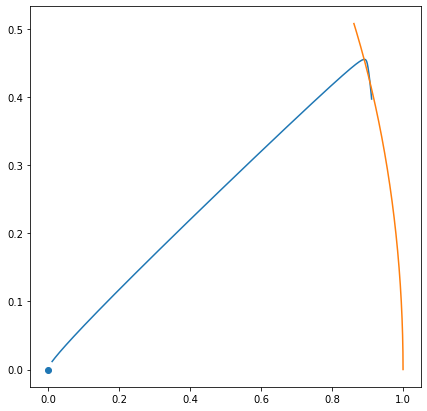

In [246]:
x_c=dradio*np.cos(dphi)
y_c=dradio*np.sin(dphi)
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(0,0)
ax1.plot(x_c,y_c)
x_l=np.cos(t*w)
y_l=np.sin(t*w)
ax1.plot(x_l,y_l)


In [247]:
t_r=[]
x_c_r=[]
y_c_r=[]
x_l_r=[]
y_l_r=[]
for i in range(len(t)):
    if t[i]%1000==0:
        t_r.append(t[i])
        x_c_r.append(x_c[i])
        y_c_r.append(y_c[i])
        x_l_r.append(x_l[i])
        y_l_r.append(y_l[i])        
r_t=np.array(t_r)/86400
x_c_r_=np.array(x_c_r)
y_c_r_=np.array(y_c_r)
x_l_r_=np.array(x_l_r)
y_l_r_=np.array(y_l_r)

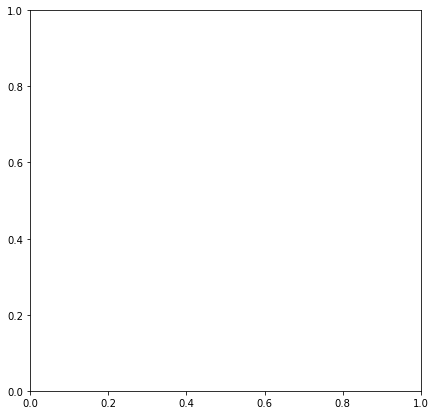

In [248]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
    
def init():
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)
    ax.scatter(0,0,label="tierra")


def Update(i):
    
    plot = ax.clear()
    init()
    
    

        
    x_c_r = x_c_r_[i]
    y_c_r = y_c_r_[i]
    x_l_r = x_l_r_[i]
    y_l_r = y_l_r_[i]
   

  
    plot = ax.set_title(r'$t=%.4f \ días$' %(r_t[i]))
        
    plot = ax.scatter(x_c_r,y_c_r,marker='.',color="r", label="cohete")
    plot = ax.scatter(x_l_r,y_l_r,marker='.',color="BLACK", label="luna") 
        
     
   
    plot = ax.legend()
            
    return plot
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t_r),init_func=init)

In [249]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=30, metadata=dict(artist='FaberJoan'))
Animation.save('CoheteFaberJoan.mp4', writer=writer_)